# **Lesson 7: Data Collection and Preprocessing**

In [1]:
# All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

---

## **1. Data Collection**

### **1.1 Data Sources and Collection Methods**

#### **Common Data Sources**
- **APIs:** Application Programming Interfaces, such as Twitter API or Alpha Vantage for financial data.
- **Web Scraping:** Using libraries like `BeautifulSoup` or `Scrapy` to extract data from websites.
- **Databases:** SQL databases like MySQL and PostgreSQL or NoSQL databases like MongoDB.
- **Public Datasets:** Websites like Kaggle or UCI Machine Learning Repository.
- **CSV/Excel Files:** Flat files stored on local machines or data lakes.

In [2]:
# Example: Creating a sample DataFrame for illustration
data = {
    'Name': ['Alice', 'Bob', 'Charlie', np.nan, 'Eva'],
    'Age': [25, 30, 35, None, 105],
    'Email': ['alice@example.com', None, 'charlie@somemail', 'na', 'eva@domain.com'],
    'JoinDate': ['2021-01-01', '2020-06-15', None, '2019-07-20', 'NA'],
    'Salary': [70000, 50000, None, 0, 150000]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
      Name    Age              Email    JoinDate    Salary
0    Alice   25.0  alice@example.com  2021-01-01   70000.0
1      Bob   30.0               None  2020-06-15   50000.0
2  Charlie   35.0   charlie@somemail        None       NaN
3      NaN    NaN                 na  2019-07-20       0.0
4      Eva  105.0     eva@domain.com          NA  150000.0


---

## **2. Data Preprocessing**

### **2.1 Data Cleaning and Preprocessing Techniques**

Data cleaning identifies and corrects inaccuracies, removes irrelevant information, and fills gaps in the data to enhance its quality.

---

### **Step 1: Find the Dirt**

#### **Identifying Common Issues:**
- **Missing Values:** Check for NaN or null values.
- **Outliers:** Extreme values that may skew or misrepresent your data.
- **Inconsistencies:** Different representations of the same information.
- **Invalid Data:** Data that doesn't make logical sense.



Missing Values per Column:
Name        1
Age         1
Email       1
JoinDate    1
Salary      1
dtype: int64


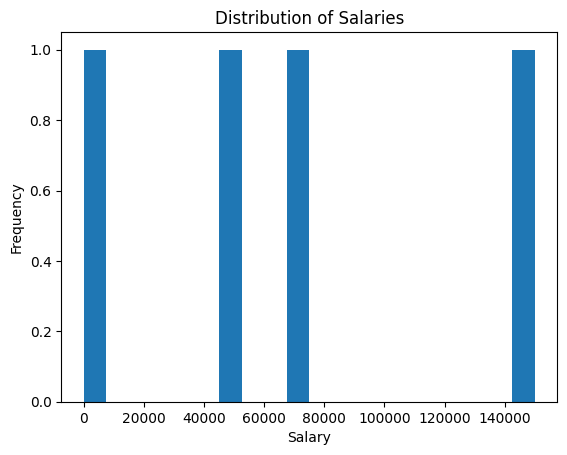

In [3]:
# Check for missing data
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Visualize possible outliers
plt.hist(df['Salary'], bins=20)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

---

### **Step 2: Scrub the Dirt**

#### **2.1 Handling Missing Data**

- **Remove Missing Data**

In [4]:
# Dropping rows with missing Name and Age
df_cleaned = df.dropna(subset=['Name', 'Age'])

- **Replace with Aggregates**

In [5]:
# Impute missing email with a placeholder
df_cleaned['Email'].fillna('unknown@unknown.com', inplace=True)

/var/folders/dt/tgmydmjd1g354lgxy3yn76g40000gn/T/ipykernel_37586/634815321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Email'].fillna('unknown@unknown.com', inplace=True)
/var/folders/dt/tgmydmjd1g354lgxy3yn76g40000gn/T/ipykernel_37586/634815321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Email'].fillna(

- **Recode Missing Data**

In [6]:
# Recode `JoinDate` NaNs as "unknown"
df_cleaned['JoinDate'].replace('NA', np.nan, inplace=True)
df_cleaned['Joined'] = df_cleaned['JoinDate'].notnull().astype(int)

/var/folders/dt/tgmydmjd1g354lgxy3yn76g40000gn/T/ipykernel_37586/1300245141.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['JoinDate'].replace('NA', np.nan, inplace=True)
/var/folders/dt/tgmydmjd1g354lgxy3yn76g40000gn/T/ipykernel_37586/1300245141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['JoinDate'].replace

**Interpolate Missing Data**

Interpolation can estimate missing values by using the data before and after the missing point. This is especially useful for time series data.

In [15]:
# Sample DataFrame
data = {'time': pd.date_range(start='2023-01-01', periods=5), 'value': [1, np.nan, np.nan, 4, 5]}
df = pd.DataFrame(data)

# Interpolating missing values
df['value'] = df['value'].interpolate(method='linear')
print(df)

        time  value
0 2023-01-01    1.0
1 2023-01-02    2.0
2 2023-01-03    3.0
3 2023-01-04    4.0
4 2023-01-05    5.0


### 2. **Forward Fill/Backward Fill (Imputation Using Nearby Values)**

- **Forward Fill**: Use the last known value to fill the missing value.
- **Backward Fill**: Use the next known value to fill the missing value.

In [17]:
# Forward fill method
df['value'] = df['value'].ffill()

# Backward fill method
df['value'] = df['value'].bfill()

### 3. **Using a Model to Predict Missing Values**

Use machine learning models to predict what the missing values might be based on other features in the dataset.

### 4. **Custom Function for Imputation**

You can define a custom function that applies specific rules for imputing missing values based on domain knowledge.

#### **2.2 Handling Outliers**
- **Detecting Outliers using IQR**

In [7]:
# Remove outliers from Salary
Q1 = df_cleaned['Salary'].quantile(0.25)
Q3 = df_cleaned['Salary'].quantile(0.75)
IQR = Q3 - Q1
filter = (df_cleaned['Salary'] >= Q1 - 1.5 * IQR) & (df_cleaned['Salary'] <= Q3 + 1.5 * IQR)
df_cleaned = df_cleaned.loc[filter]

- **Handling Outliers**
  - **Remove**: `df = df[(df['column'] >= lower_limit) & (df['column'] <= upper_limit)]`
  - **Segment**: `df['category'] = np.where(condition, 'outlier', 'normal')`

#### **2.3 Contaminated and Inconsistent Data**

In [8]:
# Ensure emails are lower-cased
df_cleaned['Email'] = df_cleaned['Email'].str.lower().str.strip()

#### **2.4 Invalid Data**

In [9]:
# Removing logically invalid values
df_cleaned = df_cleaned[df_cleaned['Age'] <= 100]

#### **2.5 Duplicate Data**

In [10]:
# Removing duplicates
df_cleaned.drop_duplicates(inplace=True)


#### **2.6 Data Type Issues**

- **Strings:**

In [13]:
# Standardize casing and remove whitespace
# df['column'] = df['column'].str.lower().str.strip()

- **Dates:**

In [12]:
# Converting to datetime
df_cleaned['JoinDate'] = pd.to_datetime(df_cleaned['JoinDate'], errors='coerce')


---

### **3. Rinse and Repeat**

- **Iterate Through the Cleaning Process**
  - Continually reassess and refine data quality.
  - Visualize data to identify new potential inconsistencies or issues.



---